In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

import konlpy
from konlpy.tag import Twitter, Okt

import gensim
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim import corpora, models
from gensim.models import LdaMulticore
from gensim.models import Word2Vec
from gensim.corpora import Dictionary, MmCorpus

import pyLDAvis
import pyLDAvis.gensim
import pickle

from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

from os import path
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource

Duplicate key in file WindowsPath('c:/Users/god12/Anaconda3/envs/wassup/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  sans-serif')


In [2]:
#df = pd.read_csv('발라드_4841곡_240402.csv')
#df = pd.read_csv('알앤비_4927곡_240402.csv')
#df = pd.read_csv('인디_5000곡_240402.csv')
#df = pd.read_csv('kor_ballad.csv')
#df = pd.read_csv('kor_dance.csv')
#df = pd.read_csv('kor_indie.csv')
#df = pd.read_csv('kor_rnb.csv')
#df = pd.read_csv('kor_rock.csv')
#df = pd.read_csv('kor_trot.csv')
#df = pd.read_csv('kor_folk.csv')
df = pd.read_csv('kor_hiphop.csv')
print(len(df))
df.head()

1645


,Title,Likes,Singer,Lyrics
0,EASY,"64,116",LE SSERAFIM (르세라핌),다친대도 길을 걸어 kiss me\n쉽지 않음 내가 쉽게 easy\nStage 위엔...
1,홀씨,"47,353",아이유,내가 누울 자린 아마도\n한참 더 위로\n아니 적당히 미끈한 곳에\n뿌리내리긴 싫어...
2,봄날,"560,716",방탄소년단,보고 싶다\n이렇게 말하니까 더 보고 싶다\n너희 사진을 보고 있어도\n보고 싶다\...
3,우연히 봄,"174,696",로꼬,우연히 내게 오나봐\n봄 향기가 보여\n너도 같이 오나봐\n저 멀리서 니 향기가\n...
4,우리 영화,"25,842",PLAVE,많은 장면들을 보내고 나면\n엔딩크레딧에는 너와 나뿐이야\n끝나지 않은 이야긴 계속...


In [3]:
lyrics = df.Lyrics.to_list()
print(len(lyrics))
print(lyrics[0])
#file_name = 'song_ballad_text.txt'
#file_name = 'song_rnb_text.txt'
#file_name = 'song_indi_text.txt'
#file_name = 'kor_ballad_text.txt'
#file_name = 'kor_dance_text.txt'
#file_name = 'kor_indie_text.txt'
#file_name = 'kor_rnb_text.txt'
#file_name = 'kor_rock_text.txt'
#file_name = 'kor_trot_text.txt'
#file_name = 'kor_folk_text.txt'
file_name = 'kor_hiphop_text.txt'
with open(file_name, 'w', encoding = 'utf-8') as file:
    file.write('\n'.join(lyrics))

1645
다친대도 길을 걸어 kiss me
쉽지 않음 내가 쉽게 easy
Stage 위엔 불이 튀어, 내 body
Pull up and I rip it up like ballet

Damn, I really make it look easy
Yuh know that I make it look easy

Clap your hands, 너도 나와 같다면 clap your hands now
의구심 따윈 그냥 치워, 그냥 말해 “I’m the real one”

조명 꺼진 뒤의 난 wander in the night
Don’t know what is right, don’t know ‘bout my rights
시기심, 의심, 불신, 이젠 friends of me, yuh
세상에게 난 반쪽짜리 seraphim, yuh

Uhm I’ve been tryin’ so long to show you show you show you
I’m the one that you need

다친대도 길을 걸어 kiss me
쉽지 않음 내가 쉽게 easy
Stage 위엔 불이 튀어, 내 body
Pull up and I rip it up like ballet

Damn, I really make it look easy
Yuh know that I make it look easy

Yah know that I make it look easy
수면 위의 백조가 돼 whippin’
때론 풀려, 나의 다리 but I keep it
Get, set, go, come and see me, I’m the FEARLESS

나의 발걸음은 매 순간 history, 이건 my way
영웅처럼 걸어 even if I am not flawless
편하게만 왔다고?
날 몰라봤다면 you have to know

Uhm I’ve been tryin’ so long to show you show you show you
I’m the one that you need

다친대도 길을 걸어 kiss me
쉽지 않음 내가 쉽

In [4]:
with open('kor_hiphop_text.txt', 'r', encoding = 'utf-8') as f:
    lyrics = f.read()
print(lyrics[:50])

다친대도 길을 걸어 kiss me
쉽지 않음 내가 쉽게 easy
Stage 위엔 불이 튀어


In [5]:
okt = Okt()

stop_words = ['\n', '?', '.', ',', '!', '\r', "'"]
def normalize(lyric):
    nouns = okt.nouns(lyric)
    lyric_noun = [noun for noun in nouns if len(noun) > 1 and noun not in stop_words]
    return lyric_noun

In [6]:
normalized_text = normalize(lyrics)

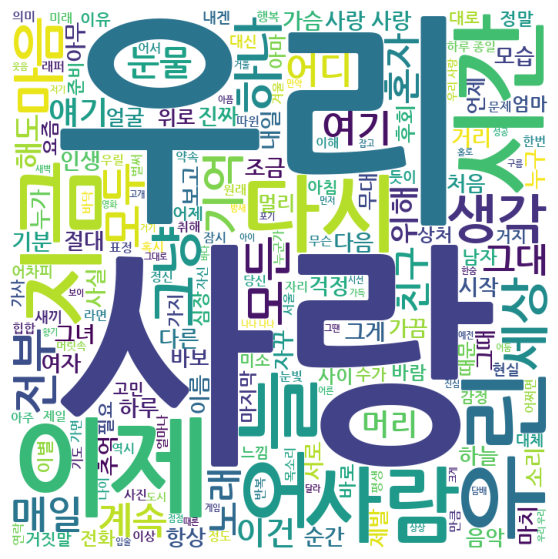

In [7]:
text = ' '.join(normalized_text)
wc = WordCloud(font_path = 'NanumGothicBold.ttf', width = 700, height = 700, background_color = 'white').generate(text)
#wc.to_file('wc/ballad_wc.png')
#wc.to_file('wc/rnb_wc.png')
#wc.to_file('wc/indi_wc.png')
#wc.to_file('wc/kor_ballad_wc.png')
#wc.to_file('wc/kor_dance_wc.png')
#wc.to_file('wc/kor_indie_wc.png')
#wc.to_file('wc/kor_rnb_wc.png')
#wc.to_file('wc/kor_rock_wc.png')
#wc.to_file('wc/kor_trot_wc.png')
#wc.to_file('wc/kor_folk_wc.png')
wc.to_file('wc/kor_hiphop_wc.png')
plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(wc)
plt.show()

In [52]:
ballad = pd.read_csv('kor_ballad.csv')
dance = pd.read_csv('kor_dance.csv')
indie = pd.read_csv('kor_indie.csv')
rnb = pd.read_csv('kor_rnb.csv')
rock = pd.read_csv('kor_rock.csv')
trot = pd.read_csv('kor_trot.csv')
df = pd.concat([ballad, dance])
df = pd.concat([df, indie])
df = pd.concat([df, rnb])
df = pd.concat([df, rock])
df = pd.concat([df, trot])
print(len(df))

27562


In [54]:
lyrics = df.Lyrics.to_list()
with open('kor_all_text.txt', 'w', encoding = 'utf-8') as file:
    file.write('\n'.join(lyrics))

In [56]:
with open('kor_all_text.txt', 'r', encoding = 'utf-8') as f:
    lyrics = f.read()
print(lyrics[:50])

Dearest, Darling, My universe

날 데려가 줄래?

나의 이 가난한


In [57]:
normalized_text = normalize(lyrics)

java.lang.OutOfMemoryError: java.lang.OutOfMemoryError: Java heap space

In [ ]:
text = ' '.join(normalized_text)
wc = WordCloud(font_path = 'NanumGothicBold.ttf', width = 700, height = 700, background_color = 'white').generate(text)
wc.to_file('wc/kor_all_wc.png')
plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(wc)
plt.show()